Adam Maltoni

Ibón de Mingo

BBDD - P1 - 3ero CEIDD

### **General imports and connection params**

In [1]:
from modules.util import get_connection
from modules.connection import *

## **Parte 1: Generar datos**

### **1.1: Definición de providers**

In [2]:
from modules.data_generation import MasterProvider

### **1.2: Generación de datos y guardado en archivos**

In [3]:
from modules.util import create_json, create_csv, merge_data

flag = True
if flag:
    prov = MasterProvider()
    us, veh = prov.generate(1000, 2000)
    print(f"Number of (users, vehicles): {len(us), len(veh)}")
    print(us[0])
    print(veh[0])

    mix = merge_data(us, veh)
    create_csv(['out/csv/users.csv', 'out/csv/vehicles.csv'], [us, veh])
    create_json(['out/json/users.json','out/json/vehicles.json','out/json/mix.json'] , [us, veh, mix])

100%|██████████| 2000/2000 [00:00<00:00, 19546.57it/s]


Number of (users, vehicles): (1000, 2000)
{'nombre': 'Albano Grande Palacios', 'dni': '48029941F', 'email': 'albanograndepalacios3696293@yahoo.com', 'telefono_movil': '+34826616303', 'telefono_fijo': '911170903', 'direccion': 'Pasadizo Ambrosio Lledó 86', 'ciudad': 'Felix', 'codigo_postal': '04728', 'provincia': 'Almería'}
{'matricula': '4603-JPN', 'numero_bastidor': '412RZNWA7Y8UJPEWJ', 'anno': 2017, 'marca': 'Kia', 'modelo': 'Sorento', 'categoria': 'sedán', 'dni_usuario': '95526771C'}


## **Parte 2: Tratamiento de datos pre-testing**

### **2.1: Definición esquema de datos, creación tablas**

In [4]:
from modules.data_schema import create_tables

flag = True
if flag:
    for db, params in zip(['psql','sqlite', 'duck'], [PSQL_PARAMS, SQLITE_PARAMS, DUCK_PARAMS]):
        
        conn = get_connection(db, params)
        
        try:
            create_tables(conn, db_type=db, commit=True)
            print(f"Tables created in {db} database")
        except Exception as e:
            print(f"Error creating tables in {db} database: {e}")
        finally:
            conn.close()

"""No es necesaria schema definition en MongoDB ya que presenta schema on-read"""

Tables created in psql database
Tables created in sqlite database
Tables created in duck database


'No es necesaria schema definition en MongoDB ya que presenta schema on-read'

### **2.2: Operaciones de delete, insert, select y update sobre DB's**

In [5]:
from modules.db_operations import delete_data, insert_data, select_all_records, run_custom_select, update_record

#### **Delete**

In [6]:
flag = True
if flag:
    delete_data('psql', PSQL_PARAMS, ['usuarios', 'vehiculos'])
    delete_data('sqlite', SQLITE_PARAMS, ['usuarios', 'vehiculos'])
    delete_data('mongo', MONGO_PARAMS, ['usuarios', 'vehiculos', 'mix'])
    delete_data('duck', DUCK_PARAMS, ['usuarios', 'vehiculos'])

Deleting tables from db psql: 2it [00:00, 1293.94it/s]
Deleting tables from db sqlite: 2it [00:00, 660.88it/s]
Deleting collections from db mongo: 100%|██████████| 3/3 [00:00<00:00, 81.70it/s]
Deleting tables from db duck: 2it [00:00, 1717.92it/s]


#### **Insert**

In [7]:
flag = True
if flag:
    insert_data('psql', PSQL_PARAMS, 'out/csv/users.csv', 'usuarios')
    insert_data('psql', PSQL_PARAMS, 'out/csv/vehicles.csv', 'vehiculos')

    insert_data('sqlite', SQLITE_PARAMS, 'out/csv/users.csv', 'usuarios')
    insert_data('sqlite', SQLITE_PARAMS, 'out/csv/vehicles.csv', 'vehiculos')

    insert_data('mongo', MONGO_PARAMS, 'out/json/users.json', 'usuarios')
    insert_data('mongo', MONGO_PARAMS, 'out/json/vehicles.json', 'vehiculos')
    insert_data('mongo', MONGO_PARAMS, 'out/json/mix.json', 'mix')

    insert_data('duck', DUCK_PARAMS, 'out/json/users.json', 'usuarios', batch_size=10000)
    insert_data('duck', DUCK_PARAMS, 'out/json/vehicles.json', 'vehiculos', batch_size=10000) # duckdb is slow!

Inserting rows in chunks of 10000 in db duck: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


#### **Select**

In [8]:
flag = True
if flag:
    _a = select_all_records('psql', PSQL_PARAMS, 'usuarios')
    select_all_records('psql', PSQL_PARAMS, 'vehiculos')

    _b = select_all_records('sqlite', SQLITE_PARAMS, 'usuarios')
    select_all_records('sqlite', SQLITE_PARAMS, 'vehiculos')

    _c = select_all_records('mongo', MONGO_PARAMS, 'usuarios')
    select_all_records('mongo', MONGO_PARAMS, 'vehiculos')
    select_all_records('mongo', MONGO_PARAMS, 'mix')

    _d = select_all_records('duck', DUCK_PARAMS, 'usuarios')
    select_all_records('duck', DUCK_PARAMS, 'vehiculos')

    if _a and _b and _c and _d:
        print(f"Comprobación primera persona de cada select: \n{_a[0]}\n{_b[0]}\n{_c[0]}\n{_d[0]}")
    else:
        print("No se encontraron resultados en una o más consultas.")

Comprobación primera persona de cada select: 
('Albano Grande Palacios', '48029941F', 'albanograndepalacios3696293@yahoo.com', '34826616303', '911170903', 'Pasadizo Ambrosio Lledó 86', 'Felix', '04728', 'Almería')
('Albano Grande Palacios', '48029941F', 'albanograndepalacios3696293@yahoo.com', '34826616303', '911170903', 'Pasadizo Ambrosio Lledó 86', 'Felix', '04728', 'Almería')
{'nombre': 'Albano Grande Palacios', 'dni': '48029941F', 'email': 'albanograndepalacios3696293@yahoo.com', 'telefono_movil': '+34826616303', 'telefono_fijo': '911170903', 'direccion': 'Pasadizo Ambrosio Lledó 86', 'ciudad': 'Felix', 'codigo_postal': '04728', 'provincia': 'Almería'}
('Albano Grande Palacios', '48029941F', 'albanograndepalacios3696293@yahoo.com', '+34826616303', '911170903', 'Pasadizo Ambrosio Lledó 86', 'Felix', '04728', 'Almería')


In [9]:
flag = True
if flag:
    _a = run_custom_select('psql', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=PSQL_PARAMS)
    _b = run_custom_select('sqlite', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=SQLITE_PARAMS)
    _c = run_custom_select('mongo', {'provincia': "Madrid"}, table='usuarios', params=MONGO_PARAMS)
    _d = run_custom_select('duck', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=DUCK_PARAMS)

    if _a and _b and _c and _d:
        print(f"Comprobación primera persona de Madrid: \n{_a[0]}\n{_b[0]}\n{_c[0]}\n{_d[0]}")
    else:
        print("No se encontraron resultados en una o más consultas.")

Comprobación primera persona de Madrid: 
('Adolfo Huertas Prada', '71511586D', 'adolfohuertasprada1997933@hotmail.com', '34886231385', '985005645', 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'Getafe', '28906', 'Madrid')
('Adolfo Huertas Prada', '71511586D', 'adolfohuertasprada1997933@hotmail.com', '34886231385', '985005645', 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'Getafe', '28906', 'Madrid')
{'nombre': 'Adolfo Huertas Prada', 'dni': '71511586D', 'email': 'adolfohuertasprada1997933@hotmail.com', 'telefono_movil': '+34886231385', 'telefono_fijo': '985005645', 'direccion': 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'ciudad': 'Getafe', 'codigo_postal': '28906', 'provincia': 'Madrid'}
('Adolfo Huertas Prada', '71511586D', 'adolfohuertasprada1997933@hotmail.com', '+34886231385', '985005645', 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'Getafe', '28906', 'Madrid')


#### **Update**

In [10]:
flag = True
if flag:  # Everyone from Madrid will now be named Adamsito
    update_record('psql', PSQL_PARAMS, 'usuarios', 'nombre', 'Adamsito', 'provincia = \'Madrid\'')
    update_record('sqlite', SQLITE_PARAMS, 'usuarios', 'nombre', 'Adamsito', 'provincia = \'Madrid\'')
    update_record('mongo', MONGO_PARAMS, 'usuarios', 'nombre', 'Adamsito', {'provincia': 'Madrid'})
    update_record('duck', DUCK_PARAMS, 'usuarios', 'nombre', 'Adamsito', "provincia = 'Madrid'")

    _a = run_custom_select('psql', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=PSQL_PARAMS)
    _b = run_custom_select('sqlite', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=SQLITE_PARAMS)
    _c = run_custom_select('mongo', {'provincia': "Madrid"}, table='usuarios', params=MONGO_PARAMS)
    _d = run_custom_select('duck', "SELECT * FROM usuarios WHERE provincia = 'Madrid'", params=DUCK_PARAMS)

    if _a and _b and _c and _d:
        print(f"Comprobación primera persona de Madrid: \n{_a[0]}\n{_b[0]}\n{_c[0]}\n{_d[0]}")
    else:
        print("No se encontraron resultados en una o más consultas, o el update ha fallado.")

Comprobación primera persona de Madrid: 
('Adamsito', '76212890K', 'marcelovalero-losada2715891@gmail.com', '34845285805', '942369099', 'Glorieta de Teodoro Navarro 71', 'Corpa', '28811', 'Madrid')
('Adamsito', '71511586D', 'adolfohuertasprada1997933@hotmail.com', '34886231385', '985005645', 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'Getafe', '28906', 'Madrid')
{'nombre': 'Adamsito', 'dni': '71511586D', 'email': 'adolfohuertasprada1997933@hotmail.com', 'telefono_movil': '+34886231385', 'telefono_fijo': '985005645', 'direccion': 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'ciudad': 'Getafe', 'codigo_postal': '28906', 'provincia': 'Madrid'}
('Adamsito', '71511586D', 'adolfohuertasprada1997933@hotmail.com', '+34886231385', '985005645', 'Pasadizo Régulo Ugarte 27 Apt. 25 ', 'Getafe', '28906', 'Madrid')


## **Parte 3: Análisis de rendimientos**



Running tests with data size: 1000
----------------------------------------
Generating users...


100%|██████████| 1000/1000 [00:00<00:00, 11543.46it/s]


<lambda> in data generation: 
	Real time: 0.08916 seconds
	CPU time: 0.08855 seconds




100%|██████████| 1000/1000 [00:00<00:00, 10788.21it/s]

<lambda> in data generation:  --> Average time in 5 is 0.08 seconds


Max memory usage: 0.25 GB
Memory used by data: 0.01 MB
Generating vehicles...


100%|██████████| 2000/2000 [00:00<00:00, 18378.58it/s]


<lambda> in data generation: 
	Real time: 0.11085 seconds
	CPU time: 0.11079 seconds




100%|██████████| 2000/2000 [00:00<00:00, 16726.33it/s]

<lambda> in data generation:  --> Average time in 5 is 0.11 seconds


Max memory usage: 0.25 GB
Memory used by data: 0.02 MB
Merging users and vehicles...
<lambda> in data generation: 
	Real time: 0.00362 seconds
	CPU time: 0.00359 seconds


<lambda> in data generation:  --> Average time in 5 is 0.00 seconds
Max memory usage: 0.25 GB
Memory used by data: 0.01 MB
Running tests in: Merging data
merge_data in data generation: 
	Real time: 0.00408 seconds
	CPU time: 0.00406 seconds


merge_data in data generation:  --> Average time in 5 is 0.00 seconds
----------------------------------------
Running tests in: Creating CSVs
create_csv in data generation: 
	Real time: 0.01330 seconds
	CPU time: 0.01323 seconds


create_csv in data generation:  --> Average time in 5 is 0.01 seconds
----------------------------------------
Running tests in: Creating JSONs
create_json in data generation: 
	Real time: 0.05240 seconds
	CPU time: 0.05230 seconds


create_json in data generation:  --> Average time in 5 is 0.05 seconds
----------------------------------------


Runni

100%|██████████| 2000/2000 [00:00<00:00, 13158.42it/s]


<lambda> in data generation: 
	Real time: 0.15417 seconds
	CPU time: 0.15371 seconds




100%|██████████| 2000/2000 [00:00<00:00, 12123.54it/s]

<lambda> in data generation:  --> Average time in 5 is 0.18 seconds


Max memory usage: 0.27 GB
Memory used by data: 0.02 MB
Generating vehicles...


100%|██████████| 4000/4000 [00:00<00:00, 19131.43it/s]


<lambda> in data generation: 
	Real time: 0.21206 seconds
	CPU time: 0.21171 seconds




100%|██████████| 4000/4000 [00:00<00:00, 17258.42it/s]

<lambda> in data generation:  --> Average time in 5 is 0.26 seconds


Max memory usage: 0.27 GB
Memory used by data: 0.03 MB
Merging users and vehicles...
<lambda> in data generation: 
	Real time: 0.00703 seconds
	CPU time: 0.00700 seconds


<lambda> in data generation:  --> Average time in 5 is 0.01 seconds
Max memory usage: 0.28 GB
Memory used by data: 0.01 MB
Running tests in: Merging data
merge_data in data generation: 
	Real time: 0.01076 seconds
	CPU time: 0.01071 seconds


merge_data in data generation:  --> Average time in 5 is 0.01 seconds
----------------------------------------
Running tests in: Creating CSVs
create_csv in data generation: 
	Real time: 0.02694 seconds
	CPU time: 0.02715 seconds


create_csv in data generation:  --> Average time in 5 is 0.03 seconds
----------------------------------------
Running tests in: Creating JSONs
create_json in data generation: 
	Real time: 0.10221 seconds
	CPU time: 0.10187 seconds


create_json in data generation:  --> Average time in 5 is 0.11 seconds
----------------------------------------


Runni

100%|██████████| 3000/3000 [00:00<00:00, 11072.54it/s]


<lambda> in data generation: 
	Real time: 0.27409 seconds
	CPU time: 0.27207 seconds




100%|██████████| 3000/3000 [00:00<00:00, 11002.65it/s]

<lambda> in data generation:  --> Average time in 5 is 0.26 seconds


Max memory usage: 0.28 GB
Memory used by data: 0.02 MB
Generating vehicles...


100%|██████████| 6000/6000 [00:00<00:00, 18877.23it/s]


<lambda> in data generation: 
	Real time: 0.32166 seconds
	CPU time: 0.32022 seconds




100%|██████████| 6000/6000 [00:00<00:00, 18777.90it/s]

<lambda> in data generation:  --> Average time in 5 is 0.34 seconds


Max memory usage: 0.29 GB
Memory used by data: 0.05 MB
Merging users and vehicles...
<lambda> in data generation: 
	Real time: 0.01349 seconds
	CPU time: 0.01341 seconds


<lambda> in data generation:  --> Average time in 5 is 0.01 seconds
Max memory usage: 0.30 GB
Memory used by data: 0.02 MB
Running tests in: Merging data
merge_data in data generation: 
	Real time: 0.01923 seconds
	CPU time: 0.01916 seconds


merge_data in data generation:  --> Average time in 5 is 0.01 seconds
----------------------------------------
Running tests in: Creating CSVs
create_csv in data generation: 
	Real time: 0.04253 seconds
	CPU time: 0.04243 seconds


create_csv in data generation:  --> Average time in 5 is 0.04 seconds
----------------------------------------
Running tests in: Creating JSONs
create_json in data generation: 
	Real time: 0.15180 seconds
	CPU time: 0.15128 seconds


create_json in data generation:  --> Average time in 5 is 0.15 seconds
----------------------------------------


Runni

100%|██████████| 4000/4000 [00:00<00:00, 12297.88it/s]


<lambda> in data generation: 
	Real time: 0.32860 seconds
	CPU time: 0.32768 seconds




100%|██████████| 4000/4000 [00:00<00:00, 11479.87it/s]

<lambda> in data generation:  --> Average time in 5 is 0.34 seconds


Max memory usage: 0.30 GB
Memory used by data: 0.03 MB
Generating vehicles...


100%|██████████| 8000/8000 [00:00<00:00, 15922.11it/s]


<lambda> in data generation: 
	Real time: 0.50703 seconds
	CPU time: 0.50463 seconds




100%|██████████| 8000/8000 [00:00<00:00, 19231.37it/s]

<lambda> in data generation:  --> Average time in 5 is 0.48 seconds


Max memory usage: 0.31 GB
Memory used by data: 0.06 MB
Merging users and vehicles...
<lambda> in data generation: 
	Real time: 0.01807 seconds
	CPU time: 0.01795 seconds


<lambda> in data generation:  --> Average time in 5 is 0.01 seconds
Max memory usage: 0.31 GB
Memory used by data: 0.03 MB
Running tests in: Merging data
merge_data in data generation: 
	Real time: 0.02131 seconds
	CPU time: 0.02118 seconds


merge_data in data generation:  --> Average time in 5 is 0.02 seconds
----------------------------------------
Running tests in: Creating CSVs
create_csv in data generation: 
	Real time: 0.05624 seconds
	CPU time: 0.05594 seconds


create_csv in data generation:  --> Average time in 5 is 0.06 seconds
----------------------------------------
Running tests in: Creating JSONs
create_json in data generation: 
	Real time: 0.21419 seconds
	CPU time: 0.21312 seconds


create_json in data generation:  --> Average time in 5 is 0.21 seconds
----------------------------------------


Runni

100%|██████████| 5000/5000 [00:00<00:00, 12082.05it/s]


<lambda> in data generation: 
	Real time: 0.41728 seconds
	CPU time: 0.41615 seconds




100%|██████████| 5000/5000 [00:00<00:00, 12324.34it/s]

<lambda> in data generation:  --> Average time in 5 is 0.43 seconds


Max memory usage: 0.33 GB
Memory used by data: 0.04 MB
Generating vehicles...


100%|██████████| 10000/10000 [00:00<00:00, 17926.73it/s]


<lambda> in data generation: 
	Real time: 0.56098 seconds
	CPU time: 0.55941 seconds




100%|██████████| 10000/10000 [00:00<00:00, 17661.86it/s]

<lambda> in data generation:  --> Average time in 5 is 0.56 seconds


Max memory usage: 0.35 GB
Memory used by data: 0.08 MB
Merging users and vehicles...
<lambda> in data generation: 
	Real time: 0.02571 seconds
	CPU time: 0.02595 seconds


<lambda> in data generation:  --> Average time in 5 is 0.02 seconds
Max memory usage: 0.35 GB
Memory used by data: 0.03 MB
Running tests in: Merging data
merge_data in data generation: 
	Real time: 0.03191 seconds
	CPU time: 0.03167 seconds


merge_data in data generation:  --> Average time in 5 is 0.02 seconds
----------------------------------------
Running tests in: Creating CSVs
create_csv in data generation: 
	Real time: 0.08071 seconds
	CPU time: 0.08045 seconds


create_csv in data generation:  --> Average time in 5 is 0.07 seconds
----------------------------------------
Running tests in: Creating JSONs
create_json in data generation: 
	Real time: 0.26343 seconds
	CPU time: 0.26236 seconds


create_json in data generation:  --> Average time in 5 is 0.27 seconds
----------------------------------------
-------

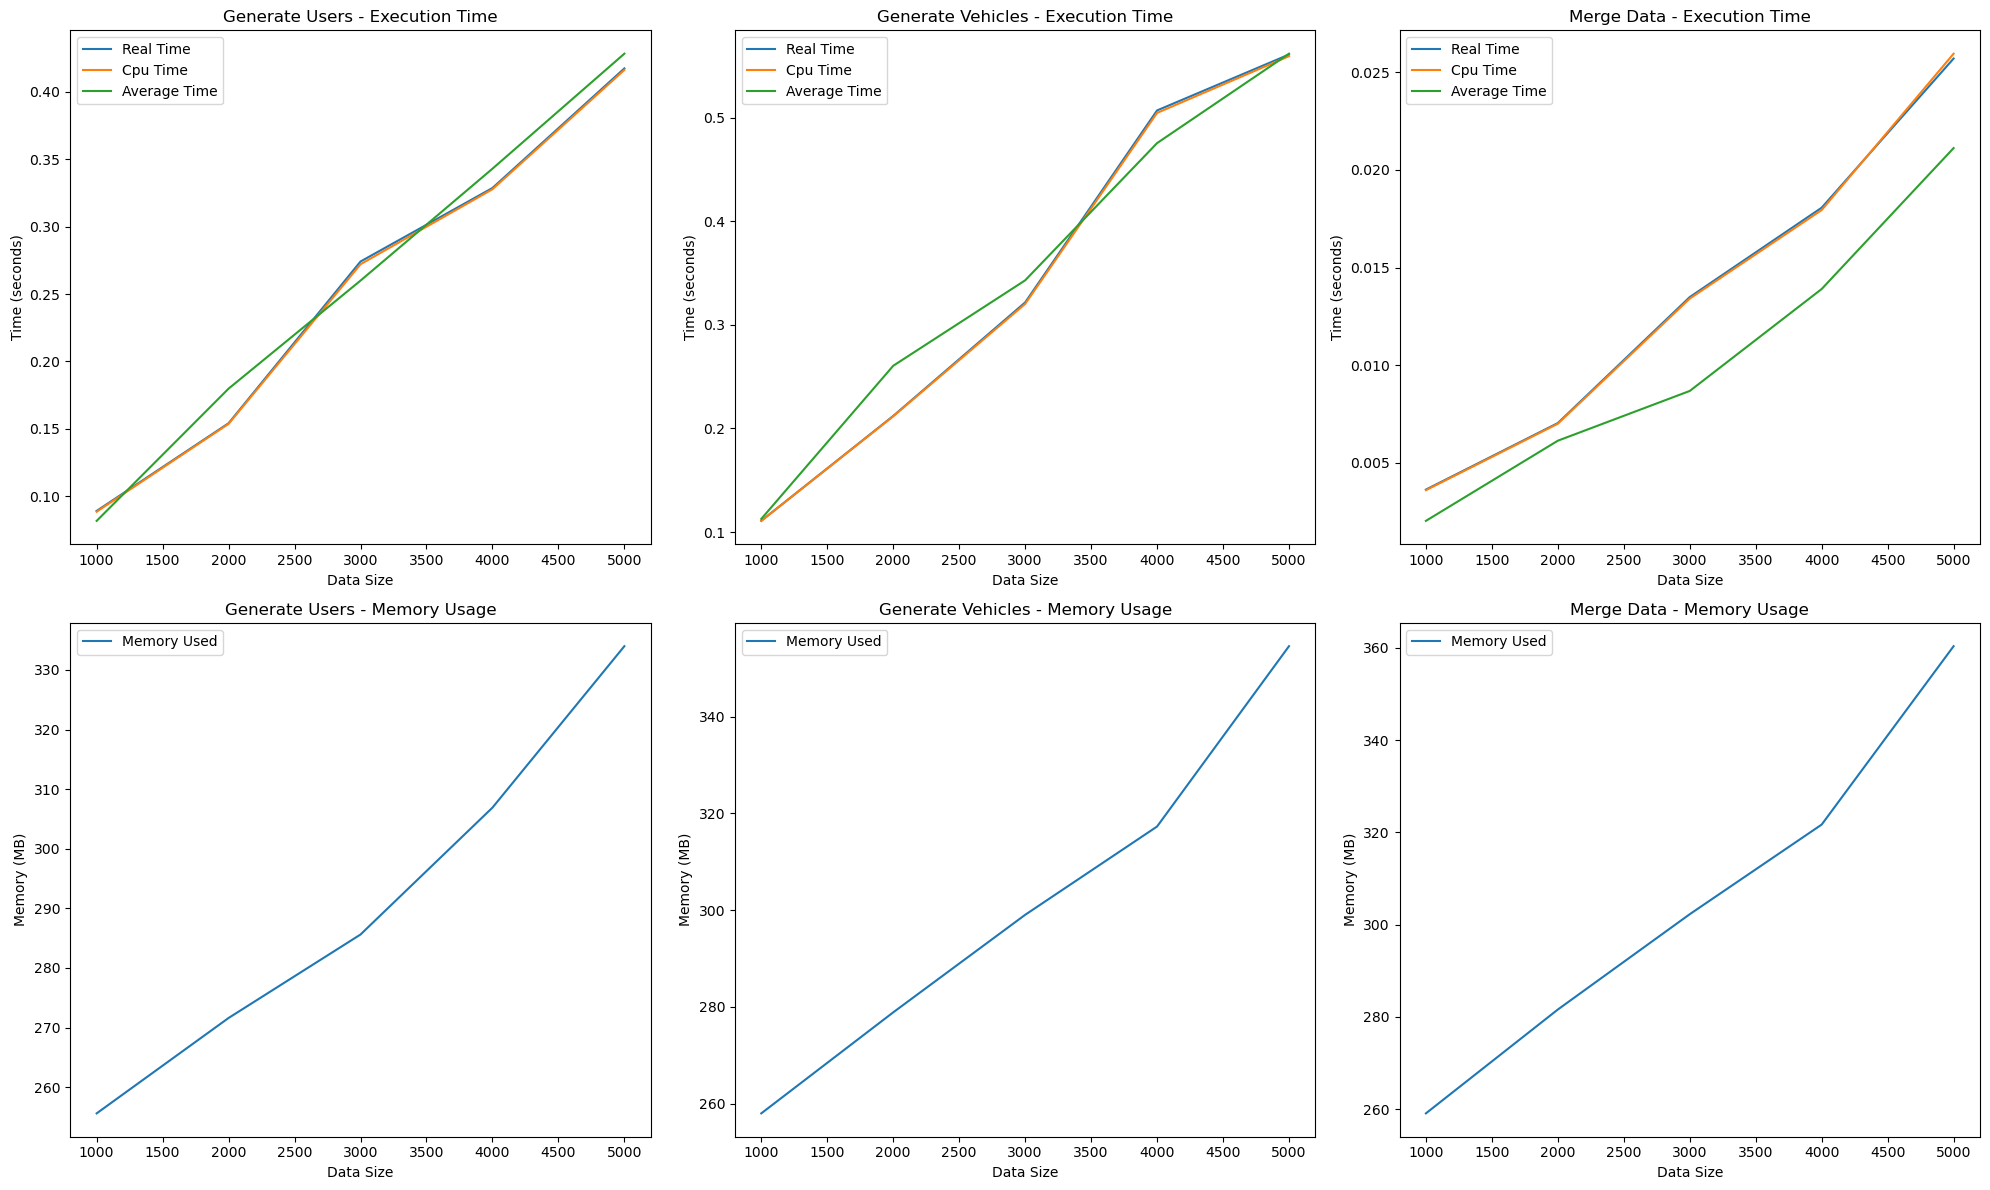

/tmp/ipykernel_51748/3427000777.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [11]:
from modules.testing import test_data_generation, plot_test_data_generation

flag = True
if flag:
    prov = MasterProvider()
    res = test_data_generation(['Merging data', 'Creating CSVs', 'Creating JSONs'], [1000, 2000,3000,4000,5000], prov, iters=5)
    fig = plot_test_data_generation(res)
    fig.show()

In [12]:
from modules.testing import test_db_operations, plot_test_db_operations

flag = True
if flag:
    prov = MasterProvider()
    res = test_db_operations([100, 200], prov, iters=1)
    fig = plot_test_db_operations(res)
    fig.show()



Running tests with data size: 100
----------------------------------------


Step 1: Generating users and vehicles...


100%|██████████| 200/200 [00:00<00:00, 15069.54it/s]




Step 2: Testing delete operations
Deleting data from psql...


Deleting tables from db psql: 2it [00:00, 104.46it/s]


delete_data in data generation: 
	Real time: 0.02421 seconds
	CPU time: 0.00464 seconds




Deleting tables from db psql: 2it [00:00, 656.28it/s]


delete_data in data generation:  --> Average time in 1 is 0.02 seconds
Deleting data from sqlite...


Deleting tables from db sqlite: 2it [00:00, 92.90it/s]


delete_data in data generation: 
	Real time: 0.02903 seconds
	CPU time: 0.00941 seconds




Deleting tables from db sqlite: 2it [00:00, 586.12it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from mongo...


Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 42.21it/s]


delete_data in data generation: 
	Real time: 0.05760 seconds
	CPU time: 0.01346 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 365.04it/s]

delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from duck...



Deleting tables from db duck: 2it [00:00, 65.78it/s]


delete_data in data generation: 
	Real time: 0.06198 seconds
	CPU time: 0.06709 seconds




Deleting tables from db duck: 2it [00:00, 1498.77it/s]


delete_data in data generation:  --> Average time in 1 is 0.02 seconds


Step 3: Testing insert operations


Deleting tables from db psql: 2it [00:00, 855.37it/s]


Inserting data into psql using method one (use_index=False)...



Inserting rows one by one in db psql: 100%|██████████| 100/100 [00:00<00:00, 155.04it/s]


insert_data in data generation: 
	Real time: 0.65497 seconds
	CPU time: 0.18598 seconds




Deleting tables from db psql: 2it [00:00, 248.59it/s]
Deleting tables from db psql: 2it [00:00, 977.24it/s]



Inserting data into psql using method one (use_index=True)...


Inserting rows one by one in db psql: 100%|██████████| 100/100 [00:00<00:00, 159.78it/s]


insert_data in data generation: 
	Real time: 0.64486 seconds
	CPU time: 0.18137 seconds




Deleting tables from db psql: 2it [00:00, 281.03it/s]
Deleting tables from db sqlite: 2it [00:00, 361.53it/s]



Inserting data into sqlite using method one (use_index=False)...


Inserting rows one by one in db sqlite: 100%|██████████| 100/100 [00:00<00:00, 625.61it/s]


insert_data in data generation: 
	Real time: 0.16911 seconds
	CPU time: 0.06399 seconds




Deleting tables from db sqlite: 2it [00:00, 701.98it/s]
Deleting tables from db sqlite: 2it [00:00, 771.37it/s]



Inserting data into sqlite using method one (use_index=True)...


Inserting rows one by one in db sqlite: 100%|██████████| 100/100 [00:00<00:00, 665.76it/s]


insert_data in data generation: 
	Real time: 0.15888 seconds
	CPU time: 0.05784 seconds




Deleting tables from db sqlite: 2it [00:00, 694.02it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1020.14it/s]



Inserting data into mongo using method one (use_index=False)...


Inserting one by one in MongoDB: 100%|██████████| 100/100 [00:00<00:00, 226.43it/s]


insert_data in data generation: 
	Real time: 0.44678 seconds
	CPU time: 0.42581 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1136.51it/s]



Inserting data into mongo using method one (use_index=True)...


Inserting one by one in MongoDB: 100%|██████████| 100/100 [00:00<00:00, 307.02it/s]


insert_data in data generation: 
	Real time: 0.33276 seconds
	CPU time: 0.30675 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 490.48it/s]
Deleting tables from db duck: 2it [00:00, 2113.00it/s]



Inserting data into duck using method one (use_index=False)...


Inserting rows one by one in db duck: 100%|██████████| 100/100 [00:04<00:00, 20.60it/s]


insert_data in data generation: 
	Real time: 4.86343 seconds
	CPU time: 4.66537 seconds




Deleting tables from db duck: 2it [00:00, 233.01it/s]
Deleting tables from db duck: 2it [00:00, 960.56it/s]



Inserting data into duck using method one (use_index=True)...


Inserting rows one by one in db duck: 100%|██████████| 100/100 [00:04<00:00, 21.53it/s]


insert_data in data generation: 
	Real time: 4.68277 seconds
	CPU time: 4.46623 seconds




Deleting tables from db duck: 2it [00:00, 242.76it/s]
Deleting tables from db psql: 2it [00:00, 806.60it/s]



Inserting data into psql using method at_once (use_index=False)...
Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.02676 seconds
	CPU time: 0.01220 seconds




Deleting tables from db psql: 2it [00:00, 479.10it/s]
Deleting tables from db psql: 2it [00:00, 2251.37it/s]



Inserting data into psql using method at_once (use_index=True)...
Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.01972 seconds
	CPU time: 0.00795 seconds




Deleting tables from db psql: 2it [00:00, 593.93it/s]
Deleting tables from db sqlite: 2it [00:00, 598.20it/s]



Inserting data into sqlite using method at_once (use_index=False)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.00569 seconds
	CPU time: 0.00464 seconds




Deleting tables from db sqlite: 2it [00:00, 653.57it/s]
Deleting tables from db sqlite: 2it [00:00, 677.32it/s]



Inserting data into sqlite using method at_once (use_index=True)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.01654 seconds
	CPU time: 0.00593 seconds




Deleting tables from db sqlite: 2it [00:00, 494.35it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 849.31it/s]



Inserting data into mongo using method at_once (use_index=False)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 306.40it/s]


insert_data in data generation: 
	Real time: 0.00961 seconds
	CPU time: 0.00929 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1300.56it/s]



Inserting data into mongo using method at_once (use_index=True)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 301.40it/s]


insert_data in data generation: 
	Real time: 0.01277 seconds
	CPU time: 0.01265 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 644.78it/s]
Deleting tables from db duck: 2it [00:00, 1610.10it/s]



Inserting data into duck using method at_once (use_index=False)...
Inserting rows at_once in db duck
insert_data in data generation: 
	Real time: 0.25137 seconds
	CPU time: 0.22247 seconds




Deleting tables from db duck: 2it [00:00, 367.81it/s]
Deleting tables from db duck: 2it [00:00, 1762.68it/s]


Inserting data into duck using method at_once (use_index=True)...
Inserting rows at_once in db duck


insert_data in data generation: 
	Real time: 0.38082 seconds
	CPU time: 0.35065 seconds




Deleting tables from db duck: 2it [00:00, 340.07it/s]
Deleting tables from db psql: 2it [00:00, 1773.12it/s]



Inserting data into psql using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 84.52it/s]


insert_data in data generation: 
	Real time: 0.02069 seconds
	CPU time: 0.01017 seconds




Deleting tables from db psql: 2it [00:00, 539.95it/s]
Deleting tables from db psql: 2it [00:00, 2042.51it/s]



Inserting data into psql using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 68.10it/s]


insert_data in data generation: 
	Real time: 0.02785 seconds
	CPU time: 0.01158 seconds




Deleting tables from db psql: 2it [00:00, 284.54it/s]
Deleting tables from db sqlite: 2it [00:00, 370.29it/s]



Inserting data into sqlite using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 369.41it/s]


insert_data in data generation: 
	Real time: 0.02832 seconds
	CPU time: 0.01753 seconds




Deleting tables from db sqlite: 2it [00:00, 210.54it/s]
Deleting tables from db sqlite: 2it [00:00, 253.19it/s]



Inserting data into sqlite using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 489.07it/s]


insert_data in data generation: 
	Real time: 0.02606 seconds
	CPU time: 0.01757 seconds




Deleting tables from db sqlite: 2it [00:00, 541.38it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 745.39it/s]



Inserting data into mongo using method chunk (use_index=False)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 216.69it/s]


insert_data in data generation: 
	Real time: 0.01273 seconds
	CPU time: 0.01232 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 627.23it/s]



Inserting data into mongo using method chunk (use_index=True)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 357.08it/s]


insert_data in data generation: 
	Real time: 0.01317 seconds
	CPU time: 0.01286 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 723.34it/s]
Deleting tables from db duck: 2it [00:00, 1363.78it/s]


Inserting data into duck using method chunk (use_index=False)...



Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


insert_data in data generation: 
	Real time: 0.37763 seconds
	CPU time: 0.35385 seconds




Deleting tables from db duck: 2it [00:00, 189.85it/s]
Deleting tables from db duck: 2it [00:00, 890.60it/s]



Inserting data into duck using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


insert_data in data generation: 
	Real time: 0.30185 seconds
	CPU time: 0.27576 seconds




Deleting tables from db duck: 2it [00:00, 382.52it/s]




Step 4: Testing select operations
Selecting data from psql...
select_all_records in data generation: 
	Real time: 0.00370 seconds
	CPU time: 0.00150 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from sqlite...
select_all_records in data generation: 
	Real time: 0.00032 seconds
	CPU time: 0.00031 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from mongo...
select_all_records in data generation: 
	Real time: 0.00341 seconds
	CPU time: 0.00310 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from duck...
select_all_records in data generation: 
	Real time: 0.00873 seconds
	CPU time: 0.00916 seconds


select_all_records in data generation:  --> Average time in 1 is 0.01 seconds


Step 5: Testing update operations
Updating data in psql...
update_record in data generation: 
	Real time: 0.00701 seconds
	CPU time: 0.00149 second

100%|██████████| 400/400 [00:00<00:00, 17054.87it/s]




Step 2: Testing delete operations
Deleting data from psql...


Deleting tables from db psql: 2it [00:00, 1898.30it/s]


delete_data in data generation: 
	Real time: 0.00644 seconds
	CPU time: 0.00460 seconds




Deleting tables from db psql: 2it [00:00, 1872.04it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from sqlite...


Deleting tables from db sqlite: 2it [00:00, 609.77it/s]


delete_data in data generation: 
	Real time: 0.00534 seconds
	CPU time: 0.00393 seconds




Deleting tables from db sqlite: 2it [00:00, 645.33it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from mongo...


Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 705.46it/s]


delete_data in data generation: 
	Real time: 0.00860 seconds
	CPU time: 0.00921 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 994.62it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from duck...


Deleting tables from db duck: 2it [00:00, 1505.49it/s]


delete_data in data generation: 
	Real time: 0.01342 seconds
	CPU time: 0.01463 seconds




Deleting tables from db duck: 2it [00:00, 1379.48it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds


Step 3: Testing insert operations


Deleting tables from db psql: 2it [00:00, 1349.08it/s]



Inserting data into psql using method one (use_index=False)...


Inserting rows one by one in db psql: 100%|██████████| 200/200 [00:01<00:00, 169.51it/s]


insert_data in data generation: 
	Real time: 1.18765 seconds
	CPU time: 0.32366 seconds




Deleting tables from db psql: 2it [00:00, 210.07it/s]
Deleting tables from db psql: 2it [00:00, 775.65it/s]



Inserting data into psql using method one (use_index=True)...


Inserting rows one by one in db psql: 100%|██████████| 200/200 [00:01<00:00, 167.87it/s]


insert_data in data generation: 
	Real time: 1.21138 seconds
	CPU time: 0.32993 seconds




Deleting tables from db psql: 2it [00:00, 179.63it/s]
Deleting tables from db sqlite: 2it [00:00, 452.88it/s]



Inserting data into sqlite using method one (use_index=False)...


Inserting rows one by one in db sqlite: 100%|██████████| 200/200 [00:00<00:00, 636.36it/s]


insert_data in data generation: 
	Real time: 0.32628 seconds
	CPU time: 0.12083 seconds




Deleting tables from db sqlite: 2it [00:00, 659.59it/s]
Deleting tables from db sqlite: 2it [00:00, 643.00it/s]



Inserting data into sqlite using method one (use_index=True)...


Inserting rows one by one in db sqlite: 100%|██████████| 200/200 [00:00<00:00, 643.34it/s]


insert_data in data generation: 
	Real time: 0.31733 seconds
	CPU time: 0.11006 seconds




Deleting tables from db sqlite: 2it [00:00, 614.73it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1248.49it/s]



Inserting data into mongo using method one (use_index=False)...


Inserting one by one in MongoDB: 100%|██████████| 200/200 [00:00<00:00, 369.78it/s]


insert_data in data generation: 
	Real time: 0.54577 seconds
	CPU time: 0.52722 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1248.68it/s]



Inserting data into mongo using method one (use_index=True)...


Inserting one by one in MongoDB: 100%|██████████| 200/200 [00:00<00:00, 347.99it/s]


insert_data in data generation: 
	Real time: 0.58166 seconds
	CPU time: 0.54781 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 471.08it/s]
Deleting tables from db duck: 2it [00:00, 1515.28it/s]



Inserting data into duck using method one (use_index=False)...


Inserting rows one by one in db duck: 100%|██████████| 200/200 [00:11<00:00, 17.72it/s]


insert_data in data generation: 
	Real time: 11.29435 seconds
	CPU time: 10.83854 seconds




Deleting tables from db duck: 2it [00:00, 188.67it/s]
Deleting tables from db duck: 2it [00:00, 1357.60it/s]



Inserting data into duck using method one (use_index=True)...


Inserting rows one by one in db duck: 100%|██████████| 200/200 [00:11<00:00, 16.89it/s]


insert_data in data generation: 
	Real time: 11.86390 seconds
	CPU time: 11.38110 seconds




Deleting tables from db duck: 2it [00:00, 173.28it/s]
Deleting tables from db psql: 2it [00:00, 1526.87it/s]



Inserting data into psql using method at_once (use_index=False)...
Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.03038 seconds
	CPU time: 0.01349 seconds




Deleting tables from db psql: 2it [00:00, 532.37it/s]
Deleting tables from db psql: 2it [00:00, 1223.54it/s]



Inserting data into psql using method at_once (use_index=True)...
Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.05237 seconds
	CPU time: 0.01834 seconds




Deleting tables from db psql: 2it [00:00, 235.77it/s]
Deleting tables from db sqlite: 2it [00:00, 433.07it/s]



Inserting data into sqlite using method at_once (use_index=False)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.01765 seconds
	CPU time: 0.01530 seconds




Deleting tables from db sqlite: 2it [00:00, 310.13it/s]
Deleting tables from db sqlite: 2it [00:00, 401.70it/s]



Inserting data into sqlite using method at_once (use_index=True)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.01695 seconds
	CPU time: 0.01623 seconds




Deleting tables from db sqlite: 2it [00:00, 468.27it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 244.20it/s]



Inserting data into mongo using method at_once (use_index=False)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 47.64it/s]


insert_data in data generation: 
	Real time: 0.04487 seconds
	CPU time: 0.02131 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1093.12it/s]



Inserting data into mongo using method at_once (use_index=True)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 157.76it/s]


insert_data in data generation: 
	Real time: 0.02738 seconds
	CPU time: 0.02049 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 430.32it/s]
Deleting tables from db duck: 2it [00:00, 1210.30it/s]



Inserting data into duck using method at_once (use_index=False)...
Inserting rows at_once in db duck
insert_data in data generation: 
	Real time: 0.58846 seconds
	CPU time: 0.53824 seconds




Deleting tables from db duck: 2it [00:00, 148.72it/s]
Deleting tables from db duck: 2it [00:00, 1108.14it/s]


Inserting data into duck using method at_once (use_index=True)...
Inserting rows at_once in db duck


insert_data in data generation: 
	Real time: 0.70491 seconds
	CPU time: 0.64697 seconds




Deleting tables from db duck: 2it [00:00, 115.13it/s]
Deleting tables from db psql: 2it [00:00, 1053.98it/s]



Inserting data into psql using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 23.12it/s]


insert_data in data generation: 
	Real time: 0.05611 seconds
	CPU time: 0.02297 seconds




Deleting tables from db psql: 2it [00:00, 279.63it/s]
Deleting tables from db psql: 2it [00:00, 972.14it/s]



Inserting data into psql using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]


insert_data in data generation: 
	Real time: 0.07712 seconds
	CPU time: 0.03443 seconds




Deleting tables from db psql: 2it [00:00, 293.02it/s]
Deleting tables from db sqlite: 2it [00:00, 498.70it/s]



Inserting data into sqlite using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 397.15it/s]


insert_data in data generation: 
	Real time: 0.01557 seconds
	CPU time: 0.01570 seconds




Deleting tables from db sqlite: 2it [00:00, 472.23it/s]
Deleting tables from db sqlite: 2it [00:00, 530.99it/s]



Inserting data into sqlite using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 470.27it/s]


insert_data in data generation: 
	Real time: 0.02681 seconds
	CPU time: 0.01588 seconds




Deleting tables from db sqlite: 2it [00:00, 326.71it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 327.78it/s]



Inserting data into mongo using method chunk (use_index=False)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 96.58it/s]


insert_data in data generation: 
	Real time: 0.02957 seconds
	CPU time: 0.01706 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1294.34it/s]



Inserting data into mongo using method chunk (use_index=True)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 177.71it/s]


insert_data in data generation: 
	Real time: 0.02065 seconds
	CPU time: 0.01746 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 322.13it/s]
Deleting tables from db duck: 2it [00:00, 1191.39it/s]



Inserting data into duck using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


insert_data in data generation: 
	Real time: 0.74714 seconds
	CPU time: 0.68943 seconds




Deleting tables from db duck: 2it [00:00, 86.80it/s]
Deleting tables from db duck: 2it [00:00, 923.04it/s]



Inserting data into duck using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


insert_data in data generation: 
	Real time: 0.69816 seconds
	CPU time: 0.62231 seconds




Deleting tables from db duck: 2it [00:00, 186.31it/s]




Step 4: Testing select operations
Selecting data from psql...
select_all_records in data generation: 
	Real time: 0.00450 seconds
	CPU time: 0.00178 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from sqlite...
select_all_records in data generation: 
	Real time: 0.00093 seconds
	CPU time: 0.00092 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from mongo...
select_all_records in data generation: 
	Real time: 0.00445 seconds
	CPU time: 0.00411 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from duck...
select_all_records in data generation: 
	Real time: 0.01157 seconds
	CPU time: 0.01197 seconds


select_all_records in data generation:  --> Average time in 1 is 0.01 seconds


Step 5: Testing update operations
Updating data in psql...
update_record in data generation: 
	Real time: 0.00497 seconds
	CPU time: 0.00140 second

100%|██████████| 600/600 [00:00<00:00, 12455.43it/s]




Step 2: Testing delete operations
Deleting data from psql...


Deleting tables from db psql: 2it [00:00, 1449.81it/s]


delete_data in data generation: 
	Real time: 0.00664 seconds
	CPU time: 0.00418 seconds




Deleting tables from db psql: 2it [00:00, 1629.81it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from sqlite...


Deleting tables from db sqlite: 2it [00:00, 555.87it/s]


delete_data in data generation: 
	Real time: 0.00550 seconds
	CPU time: 0.00402 seconds




Deleting tables from db sqlite: 2it [00:00, 552.65it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from mongo...


Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 875.91it/s]


delete_data in data generation: 
	Real time: 0.00649 seconds
	CPU time: 0.00707 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1035.12it/s]


delete_data in data generation:  --> Average time in 1 is 0.01 seconds
Deleting data from duck...


Deleting tables from db duck: 2it [00:00, 1088.72it/s]


delete_data in data generation: 
	Real time: 0.01646 seconds
	CPU time: 0.01779 seconds




Deleting tables from db duck: 2it [00:00, 1054.64it/s]


delete_data in data generation:  --> Average time in 1 is 0.02 seconds


Step 3: Testing insert operations


Deleting tables from db psql: 2it [00:00, 1260.88it/s]



Inserting data into psql using method one (use_index=False)...


Inserting rows one by one in db psql: 100%|██████████| 300/300 [00:01<00:00, 158.47it/s]


insert_data in data generation: 
	Real time: 1.90235 seconds
	CPU time: 0.52587 seconds




Deleting tables from db psql: 2it [00:00, 206.29it/s]
Deleting tables from db psql: 2it [00:00, 651.85it/s]



Inserting data into psql using method one (use_index=True)...


Inserting rows one by one in db psql: 100%|██████████| 300/300 [00:01<00:00, 153.09it/s]


insert_data in data generation: 
	Real time: 1.98838 seconds
	CPU time: 0.55753 seconds




Deleting tables from db psql: 2it [00:00, 171.31it/s]
Deleting tables from db sqlite: 2it [00:00, 391.95it/s]



Inserting data into sqlite using method one (use_index=False)...


Inserting rows one by one in db sqlite: 100%|██████████| 300/300 [00:00<00:00, 539.40it/s]


insert_data in data generation: 
	Real time: 0.57501 seconds
	CPU time: 0.22170 seconds




Deleting tables from db sqlite: 2it [00:00, 583.03it/s]
Deleting tables from db sqlite: 2it [00:00, 517.94it/s]



Inserting data into sqlite using method one (use_index=True)...


Inserting rows one by one in db sqlite: 100%|██████████| 300/300 [00:00<00:00, 576.77it/s]


insert_data in data generation: 
	Real time: 0.52869 seconds
	CPU time: 0.19910 seconds




Deleting tables from db sqlite: 2it [00:00, 560.29it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1293.54it/s]



Inserting data into mongo using method one (use_index=False)...


Inserting one by one in MongoDB: 100%|██████████| 300/300 [00:01<00:00, 260.90it/s]


insert_data in data generation: 
	Real time: 1.15521 seconds
	CPU time: 1.10000 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1195.81it/s]



Inserting data into mongo using method one (use_index=True)...


Inserting one by one in MongoDB: 100%|██████████| 300/300 [00:00<00:00, 303.28it/s]


insert_data in data generation: 
	Real time: 1.00552 seconds
	CPU time: 0.93517 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 363.06it/s]
Deleting tables from db duck: 2it [00:00, 944.66it/s]



Inserting data into duck using method one (use_index=False)...


Inserting rows one by one in db duck: 100%|██████████| 300/300 [00:18<00:00, 16.18it/s]


insert_data in data generation: 
	Real time: 18.55521 seconds
	CPU time: 17.82398 seconds




Deleting tables from db duck: 2it [00:00, 63.26it/s]
Deleting tables from db duck: 2it [00:00, 1097.84it/s]



Inserting data into duck using method one (use_index=True)...


Inserting rows one by one in db duck: 100%|██████████| 300/300 [00:19<00:00, 15.39it/s]


insert_data in data generation: 
	Real time: 19.52324 seconds
	CPU time: 18.85421 seconds




Deleting tables from db duck: 2it [00:00, 54.98it/s]
Deleting tables from db psql: 2it [00:00, 1349.30it/s]



Inserting data into psql using method at_once (use_index=False)...
Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.09477 seconds
	CPU time: 0.03747 seconds




Deleting tables from db psql: 2it [00:00, 170.31it/s]
Deleting tables from db psql: 2it [00:00, 704.21it/s]


Inserting data into psql using method at_once (use_index=True)...


Inserting rows at_once in db psql
insert_data in data generation: 
	Real time: 0.10541 seconds
	CPU time: 0.04312 seconds




Deleting tables from db psql: 2it [00:00, 393.92it/s]
Deleting tables from db sqlite: 2it [00:00, 589.09it/s]



Inserting data into sqlite using method at_once (use_index=False)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.01131 seconds
	CPU time: 0.01007 seconds




Deleting tables from db sqlite: 2it [00:00, 337.42it/s]
Deleting tables from db sqlite: 2it [00:00, 530.82it/s]



Inserting data into sqlite using method at_once (use_index=True)...
Inserting rows at_once in db sqlite
insert_data in data generation: 
	Real time: 0.01377 seconds
	CPU time: 0.01252 seconds




Deleting tables from db sqlite: 2it [00:00, 478.42it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 1082.96it/s]



Inserting data into mongo using method at_once (use_index=False)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 93.65it/s]


insert_data in data generation: 
	Real time: 0.01988 seconds
	CPU time: 0.01842 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 668.63it/s]



Inserting data into mongo using method at_once (use_index=True)...


Inserting at once in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 85.81it/s]


insert_data in data generation: 
	Real time: 0.03822 seconds
	CPU time: 0.02509 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 115.29it/s]
Deleting tables from db duck: 2it [00:00, 898.81it/s]



Inserting data into duck using method at_once (use_index=False)...
Inserting rows at_once in db duck
insert_data in data generation: 
	Real time: 1.28000 seconds
	CPU time: 1.19044 seconds




Deleting tables from db duck: 2it [00:00, 96.04it/s]
Deleting tables from db duck: 2it [00:00, 993.20it/s]


Inserting data into duck using method at_once (use_index=True)...
Inserting rows at_once in db duck


insert_data in data generation: 
	Real time: 1.22933 seconds
	CPU time: 1.13512 seconds




Deleting tables from db duck: 2it [00:00, 96.39it/s]
Deleting tables from db psql: 2it [00:00, 1538.07it/s]



Inserting data into psql using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 30.87it/s]


insert_data in data generation: 
	Real time: 0.04324 seconds
	CPU time: 0.01944 seconds




Deleting tables from db psql: 2it [00:00, 342.20it/s]
Deleting tables from db psql: 2it [00:00, 1730.68it/s]



Inserting data into psql using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db psql: 100%|██████████| 1/1 [00:00<00:00, 25.07it/s]


insert_data in data generation: 
	Real time: 0.05935 seconds
	CPU time: 0.02384 seconds




Deleting tables from db psql: 2it [00:00, 343.78it/s]
Deleting tables from db sqlite: 2it [00:00, 338.33it/s]


Inserting data into sqlite using method chunk (use_index=False)...



Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 351.84it/s]


insert_data in data generation: 
	Real time: 0.01515 seconds
	CPU time: 0.01472 seconds




Deleting tables from db sqlite: 2it [00:00, 384.92it/s]
Deleting tables from db sqlite: 2it [00:00, 487.74it/s]



Inserting data into sqlite using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db sqlite: 100%|██████████| 1/1 [00:00<00:00, 164.22it/s]


insert_data in data generation: 
	Real time: 0.03193 seconds
	CPU time: 0.02105 seconds




Deleting tables from db sqlite: 2it [00:00, 135.58it/s]
Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 526.13it/s]



Inserting data into mongo using method chunk (use_index=False)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 62.87it/s]


insert_data in data generation: 
	Real time: 0.02412 seconds
	CPU time: 0.01568 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 771.51it/s]



Inserting data into mongo using method chunk (use_index=True)...


Inserting in chunks of 1000 in MongoDB: 100%|██████████| 1/1 [00:00<00:00, 155.82it/s]


insert_data in data generation: 
	Real time: 0.02278 seconds
	CPU time: 0.02073 seconds




Deleting collections from db mongo: 100%|██████████| 2/2 [00:00<00:00, 390.86it/s]
Deleting tables from db duck: 2it [00:00, 981.12it/s]



Inserting data into duck using method chunk (use_index=False)...


Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


insert_data in data generation: 
	Real time: 1.25547 seconds
	CPU time: 1.15950 seconds




Deleting tables from db duck: 2it [00:00, 42.01it/s]
Deleting tables from db duck: 2it [00:00, 516.73it/s]



Inserting data into duck using method chunk (use_index=True)...


Inserting rows in chunks of 1000 in db duck: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


insert_data in data generation: 
	Real time: 1.15989 seconds
	CPU time: 1.02890 seconds




Deleting tables from db duck: 2it [00:00, 93.94it/s]




Step 4: Testing select operations
Selecting data from psql...
select_all_records in data generation: 
	Real time: 0.00382 seconds
	CPU time: 0.00187 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from sqlite...
select_all_records in data generation: 
	Real time: 0.00043 seconds
	CPU time: 0.00043 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from mongo...
select_all_records in data generation: 
	Real time: 0.00407 seconds
	CPU time: 0.00364 seconds


select_all_records in data generation:  --> Average time in 1 is 0.00 seconds
Selecting data from duck...
select_all_records in data generation: 
	Real time: 0.01255 seconds
	CPU time: 0.01269 seconds


select_all_records in data generation:  --> Average time in 1 is 0.01 seconds


Step 5: Testing update operations
Updating data in psql...
update_record in data generation: 
	Real time: 0.00445 seconds
	CPU time: 0.00127 second

KeyError: 'memory'

In [ ]:
res

In [ ]:
fig.show()

#### **Pruebas de caché sin índices**

In [ ]:
from modules.testing import run_tests_cache, plot_tests_cache
from modules.cache_implementation import SimpleCache, base, serde
from modules.connection import *
from modules.util import JOIN_QUERIES
from modules.data_generation import MasterProvider

flag = True
if flag:
    _params = [PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS, DUCK_PARAMS]
    prov = MasterProvider()
    custom_cache = SimpleCache()
    mem_cache = base.Client(('localhost', 11211), serde=serde.pickle_serde)
    sizes = [10]

    print('Running tests with custom cache on join queries\n')
    a = run_tests_cache(
        db_names=['psql','sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=JOIN_QUERIES
    )


    
    fig = plot_tests_cache(a)
    fig.show()

    print('\n\nRunning tests with Memcached on join queries\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=JOIN_QUERIES
    )


In [ ]:
from modules.util import PK_QUERIES, SELECT_ALL_QUERIES
from modules.connection import *
from modules.data_generation import MasterProvider
from modules.cache_implementation import SimpleCache, base, serde
from modules.testing import run_tests_cache

flag = True
if flag:
    _params = [PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS, DUCK_PARAMS]
    prov = MasterProvider()
    custom_cache = SimpleCache()
    mem_cache = base.Client(('localhost', 11211), serde=serde.pickle_serde)  # Usando Pickle para Memcached
    sizes = [10, 20]

    print('Running tests with custom cache on PK queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=PK_QUERIES,
        method='one_each'
    )

    print('Running tests with custom cache on PK queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=PK_QUERIES,
        method='at_once'
    )

    print('\n\nRunning tests with Memcached on PK queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=PK_QUERIES,
        method='one_each'
    )

    print('\n\nRunning tests with Memcached on PK queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=PK_QUERIES,
        method='at_once'
    )


    print('Running tests with custom cache on SELECT_ALL queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=SELECT_ALL_QUERIES,
        method='one_each'
    )

    print('Running tests with custom cache on SELECT_ALL queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=SELECT_ALL_QUERIES,
        method='at_once'
    )

    print('\n\nRunning tests with Memcached on SELECT_ALL queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=SELECT_ALL_QUERIES,
        method='one_each'
    )

    print('\n\nRunning tests with Memcached on SELECT_ALL queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=SELECT_ALL_QUERIES,
        method='at_once'
    )


#### **Pruebas de caché con índices**

Borramos y reinsertamos pero creando índices

In [ ]:
delete_data('psql', PSQL_PARAMS, ['usuarios', 'vehiculos'])
delete_data('sqlite', SQLITE_PARAMS, ['usuarios', 'vehiculos'])
delete_data('mongo', MONGO_PARAMS, ['usuarios', 'vehiculos', 'mix'])
delete_data('duck', DUCK_PARAMS, ['usuarios', 'vehiculos'])

In [ ]:
insert_data('psql', PSQL_PARAMS, 'out/csv/users.csv', 'usuarios')
insert_data('psql', PSQL_PARAMS, 'out/csv/vehicles.csv', 'vehiculos')

insert_data('sqlite', SQLITE_PARAMS, 'out/csv/users.csv', 'usuarios')
insert_data('sqlite', SQLITE_PARAMS, 'out/csv/vehicles.csv', 'vehiculos')

insert_data('mongo', MONGO_PARAMS, 'out/json/users.json', 'usuarios')
insert_data('mongo', MONGO_PARAMS, 'out/json/vehicles.json', 'vehiculos')
insert_data('mongo', MONGO_PARAMS, 'out/json/mix.json', 'mix')

insert_data('duck', DUCK_PARAMS, 'out/json/users.json', 'usuarios', batch_size=10000)
insert_data('duck', DUCK_PARAMS, 'out/json/vehicles.json', 'vehiculos', batch_size=10000) # duckdb is slow!

In [ ]:
from modules.cache_implementation import SimpleCache, base, serde
from modules.connection import *
from modules.util import JOIN_QUERIES
from modules.data_generation import MasterProvider

flag = True
if flag:
    _params = [PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS, DUCK_PARAMS]
    prov = MasterProvider()
    custom_cache = SimpleCache()
    mem_cache = base.Client(('localhost', 11211), serde=serde.pickle_serde)
    sizes = [10, 20]

    print('Running tests with custom cache on join queries\n')
    a = run_tests_cache(
        db_names=['psql','sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=JOIN_QUERIES,
        index=True
    )

    print('\n\nRunning tests with Memcached on join queries\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=JOIN_QUERIES,
        index=True
    )

    print('Running tests with custom cache on PK queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=PK_QUERIES,
        method='one_each',
        index=True
    )

    print('Running tests with custom cache on PK queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=PK_QUERIES,
        method='at_once',
        index=True
    )

    print('\n\nRunning tests with Memcached on PK queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=PK_QUERIES,
        method='one_each',
        index=True
    )

    print('\n\nRunning tests with Memcached on PK queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=[PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS3, DUCK_PARAMS], 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=PK_QUERIES,
        method='at_once',
        index=True
    )


    print('Running tests with custom cache on SELECT_ALL queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=SELECT_ALL_QUERIES,
        method='one_each',
        index=True
    )

    print('Running tests with custom cache on SELECT_ALL queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=custom_cache,
        queries=SELECT_ALL_QUERIES,
        method='at_once',
        index=True
    )

    print('\n\nRunning tests with Memcached on SELECT_ALL queries selecting one at the time\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=SELECT_ALL_QUERIES,
        method='one_each',
        index=True
    )

    print('\n\nRunning tests with Memcached on SELECT_ALL queries selecting all at once\n')
    run_tests_cache(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
        cache=mem_cache,
        queries=SELECT_ALL_QUERIES,
        method='at_once',
        index=True
    )


#### **Update**

In [ ]:
from modules.testing import run_tests_update, plot_test_update
from modules.connection import SQLITE_PARAMS, MONGO_PARAMS, DUCK_PARAMS, PSQL_PARAMS
from modules.data_generation import MasterProvider

flag = True
if flag:
    _params = [PSQL_PARAMS, SQLITE_PARAMS, MONGO_PARAMS, DUCK_PARAMS]
    prov = MasterProvider()
    sizes = [100, 150]

    print('Running tests for UPDATE operations\n')
    results_df = run_tests_update(
        db_names=['psql', 'sqlite', 'mongo', 'duck'], 
        params=_params, 
        sizes=sizes,
        provider=prov, 
    )

    print("Results of UPDATE tests:")
    print(results_df)

    fig = plot_test_update(results_df)
    fig.show()


## **Parte 4: Automatización de procesos (pipeline)**

In [ ]:
from modules.testing_pipeline import AutoTester
flag = True
if flag:
    test_sizes = {'huge': [50],
          'big': [20],
        'small': [10],
        'ultra_small': [10, 20]}
    
    tester = AutoTester(test_sizes, iters=1)
    tester.run_tests()

## **Parte 5: mismo test, usando el pipeline de nuestra clase AutoTester pero con tamaños grandes**

In [1]:
from modules.testing_pipeline import AutoTester
flag = False
if flag:
    
    sizes = {'huge': [5000, 10000, 20000, 50000, 100000, 400000, 1000000],
        'big': [2000, 8000, 10000, 15000, 30000],
        'small': [1000, 2000, 3000, 4000, 5000],
        'ultra_small': [100, 300, 500, 1000, 2000]}
    
    tester = AutoTester(sizes, iters=3)
    tester.run_tests()